In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Here, I'll simulate PGG outcomes for different game parameters.

In every game, a person's payout $p_i$ is given as

$$p_i = z_i - c_i + \alpha \sum_J^N c_j$$

where $z_i$ is person $i$'s initial endowment, $c_i$ is their contribution, $J$ is the set of all participants, and $\alpha$ is the marginal per capita return.

I'll systematically vary average contribution $c_i$, marginal per capita return $\alpha$ and the group size $N$.

In [2]:
z = 1
cs = np.linspace(0, 1, 11)
alphas = np.linspace(0, 1, 11)
Ns = [5, 10, 15, 20]

results = []

index = 0
for c in cs:
    for alpha in alphas:
        for N in Ns:
            if alpha < 1 / N:
                continue
            if alpha >= 1:
                continue

            p_co_co = (
                z - z * c + alpha * (N * c * z)
            )  # payout of a cooperator when everybody cooperates
            p_fr_fr = (
                z - z * c + alpha * ((N - 1) * c * z)
            )  # payout of a free rider when there is one free rider (everybody else cooperates)
            p_co_fr = z + alpha * (
                (N - 1) * c * z
            )  # payout of a cooperating person when there is one free rider
            result = pd.DataFrame(
                dict(
                    c=c,
                    alpha=alpha,
                    N=N,
                    p_co_co=p_co_co,
                    p_fr_fr=p_fr_fr,
                    p_co_fr=p_co_fr,
                ),
                index=[index],
            )
            results.append(result)
            index += 1

results = pd.concat(results)

In [3]:
results

,c,alpha,N,p_co_co,p_fr_fr,p_co_fr
0,0.0,0.1,10,1.0,1.0,1.0
1,0.0,0.1,15,1.0,1.0,1.0
2,0.0,0.1,20,1.0,1.0,1.0
3,0.0,0.2,5,1.0,1.0,1.0
4,0.0,0.2,10,1.0,1.0,1.0
...,...,...,...,...,...,...
380,1.0,0.8,20,16.0,15.2,16.2
381,1.0,0.9,5,4.5,3.6,4.6
382,1.0,0.9,10,9.0,8.1,9.1
383,1.0,0.9,15,13.5,12.6,13.6


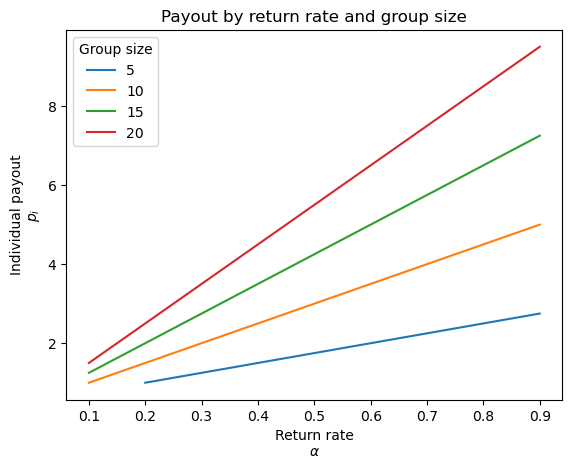

In [4]:
ax = plt.gca()

# payouts by return rate alpha and group size
for N in Ns:
    # only look at one contribution level c
    # and one group size N
    c = 0.5
    df = results.loc[(results["N"] == N) & (results["c"] == c)]

    ax.plot(df["alpha"], df["p_co_co"], label=N)
ax.set_xlabel("Return rate\n" + r"$\alpha$")
ax.set_ylabel("Individual payout\n" "$p_i$")
ax.set_title("Payout by return rate and group size")
ax.legend(title="Group size")

The plot shows that individual payouts increase with increasing group size and increasing return rate in an interacting fashion.